## Limpieza, Transformación de Datos y Filtrado de Datos

In [1]:
import pandas as pd
import numpy as np

# Cargar los datos desde el archivo TXT
file_path = "SB11_20231.TXT"
df = pd.read_csv(file_path, delimiter="|", low_memory=False)

# Mostrar primeras filas para entender la estructura
df.head()


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
1,TI,COLOMBIA,M,08/04/2007,20231,SB11202310017318,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,326,NaN,47.223972,2.0,3,100.0,PUBLICAR
2,TI,COLOMBIA,F,26/05/2006,20231,SB11202310030916,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,186,NaN,67.695519,4.0,3,40.0,PUBLICAR
3,CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR
4,TI,COLOMBIA,F,04/05/2005,20231,SB11202310044933,ESTUDIANTE,COLOMBIA,VALLE,76,...,69.0,57.0,B1,263,39.0,51.223795,3.0,3,92.0,PUBLICAR


1. Limpieza de Datos:
Primero vamos a ver que columnas contienen valores nulos.


In [2]:
# Identificar columnas con valores nulos
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]  # Filtrar solo las que tienen valores nulos

# Mostrar las columnas con valores nulos y la cantidad de nulos
null_columns


ESTU_PRESENTACIONSABADO              2
FAMI_ESTRATOVIVIENDA               799
FAMI_PERSONASHOGAR                 833
FAMI_CUARTOSHOGAR                  861
FAMI_EDUCACIONPADRE                749
FAMI_EDUCACIONMADRE                748
FAMI_TRABAJOLABORPADRE             873
FAMI_TRABAJOLABORMADRE             852
FAMI_TIENEINTERNET                 745
FAMI_TIENESERVICIOTV               756
FAMI_TIENECOMPUTADOR               846
FAMI_TIENELAVADORA                 854
FAMI_TIENEHORNOMICROOGAS           863
FAMI_TIENEAUTOMOVIL                891
FAMI_TIENEMOTOCICLETA              892
FAMI_TIENECONSOLAVIDEOJUEGOS       876
FAMI_NUMLIBROS                     869
FAMI_COMELECHEDERIVADOS            836
FAMI_COMECARNEPESCADOHUEVO         793
FAMI_COMECEREALFRUTOSLEGUMBRE      798
FAMI_SITUACIONECONOMICA            909
ESTU_DEDICACIONLECTURADIARIA       780
ESTU_DEDICACIONINTERNET            780
ESTU_HORASSEMANATRABAJA            900
ESTU_TIPOREMUNERACION              926
COLE_BILINGUE            

Se observa que un número significativo de columnas presentan valores nulos, lo que hace necesario aplicar técnicas de imputación para completar los datos faltantes. Dado que muchas de estas columnas contienen información relevante, eliminarlas no es una opción viable, ya que podría comprometer la integridad del análisis.

Primero para los que tengan menos de 10 nulos, podemos elimianrlos ya que no representan una cantidad considerable.

In [3]:
# Identificar columnas con menos de 10 valores nulos
cols_to_drop = null_columns[null_columns < 10].index.tolist()

# Eliminar estas columnas del DataFrame
df.drop(columns=cols_to_drop, inplace=True)

# Mostrar las columnas eliminadas
cols_to_drop


['ESTU_PRESENTACIONSABADO',
 'PUNT_INGLES',
 'PERCENTIL_INGLES',
 'DESEMP_INGLES',
 'PERCENTIL_GLOBAL']

Una vez eliminadas estas columnas, es importante definir cómo tratar aquellas que aún presentan una cantidad significativa de valores nulos. Podemos clasificarlas en cuatro grupos: ESTU_..., FAMI_..., COLE_... y Otros. Los tres primeros grupos pueden manejarse de manera conjunta, ya que contienen datos similares y dependen, en gran medida, de las mismas variables. Sin embargo, el grupo Otros requiere un análisis más detallado, ya que cada columna puede necesitar una solución específica según su contexto y relevancia.


In [4]:
# Identificar columnas que NO tienen valores nulos y podrían usarse para agrupación
non_null_columns = df.columns[df.isnull().sum() == 0]

# Filtrar columnas que sean categóricas y representativas para agrupación
potential_grouping_columns = [
    "ESTU_GENERO", "ESTU_DEPTO_RESIDE", "ESTU_MCPIO_RESIDE", "COLE_DEPTO_UBICACION", 
    "COLE_MCPIO_UBICACION", "COLE_NATURALEZA", "COLE_CALENDARIO", "ESTU_NACIONALIDAD"
]

# Seleccionar solo aquellas que no tienen nulos en el dataset
valid_grouping_columns = [col for col in potential_grouping_columns if col in non_null_columns]

# Mostrar las columnas recomendadas para agrupación
valid_grouping_columns


['ESTU_GENERO',
 'ESTU_DEPTO_RESIDE',
 'ESTU_MCPIO_RESIDE',
 'COLE_DEPTO_UBICACION',
 'COLE_MCPIO_UBICACION',
 'COLE_NATURALEZA',
 'COLE_CALENDARIO',
 'ESTU_NACIONALIDAD']

In [5]:
# Definir las columnas con valores nulos a analizar
columns_with_nulls = [
    "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_CUARTOSHOGAR",
    "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE",
    "FAMI_TIENEINTERNET", "FAMI_TIENESERVICIOTV", "FAMI_TIENECOMPUTADOR", "FAMI_TIENELAVADORA",
    "FAMI_TIENEHORNOMICROOGAS", "FAMI_TIENEAUTOMOVIL", "FAMI_TIENEMOTOCICLETA", "FAMI_TIENECONSOLAVIDEOJUEGOS",
    "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE",
    "FAMI_SITUACIONECONOMICA", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "ESTU_HORASSEMANATRABAJA",
    "ESTU_TIPOREMUNERACION", "COLE_BILINGUE", "COLE_CARACTER",
    "ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL", "PERCENTIL_ESPECIAL_GLOBAL"
]


# Crear un diccionario para almacenar la información de cada columna
column_analysis = {}

for col in columns_with_nulls:
    if col in df.columns:
        column_analysis[col] = {
            "Tipo de dato": df[col].dtype,
            "Valores únicos": df[col].nunique(),
            "Ejemplos de valores": df[col].dropna().unique()[:10]  # Tomar hasta 10 valores únicos sin nulos
        }
    else:
        column_analysis[col] = {
            "Tipo de dato": "No disponible",
            "Valores únicos": "No disponible",
            "Ejemplos de valores": "No disponible"
        }

# Convertir el diccionario en un DataFrame para visualizarlo mejor
df_analysis = pd.DataFrame.from_dict(column_analysis, orient="index")

# Mostrar el análisis
df_analysis


,Tipo de dato,Valores únicos,Ejemplos de valores
FAMI_ESTRATOVIVIENDA,object,7,"[Estrato 3, Estrato 2, Sin Estrato, Estrato 1,..."
FAMI_PERSONASHOGAR,object,5,"[5 a 6, 1 a 2, 3 a 4, 7 a 8, 9 o más]"
FAMI_CUARTOSHOGAR,object,6,"[Cuatro, Tres, Dos, Seis o mas, Cinco, Uno]"
FAMI_EDUCACIONPADRE,object,12,"[Educación profesional completa, Secundaria (B..."
FAMI_EDUCACIONMADRE,object,12,"[Educación profesional completa, Primaria comp..."
FAMI_TRABAJOLABORPADRE,object,13,"[Es dueño de un negocio grande, tiene un cargo..."
FAMI_TRABAJOLABORMADRE,object,13,"[Trabaja en el hogar, no trabaja o estudia, Es..."
FAMI_TIENEINTERNET,object,2,"[Si, No]"
FAMI_TIENESERVICIOTV,object,2,"[Si, No]"
FAMI_TIENECOMPUTADOR,object,2,"[Si, No]"


In [8]:
import pandas as pd

# Definir columnas categóricas, numéricas y binarias
categorical_columns = [
    "FAMI_ESTRATOVIVIENDA", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE",
    "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_NUMLIBROS",
    "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE",
    "FAMI_SITUACIONECONOMICA", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET",
    "ESTU_TIPOREMUNERACION", "COLE_BILINGUE", "COLE_CARACTER"
]

numerical_columns = [
    "ESTU_HORASSEMANATRABAJA",
    "ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL", "PERCENTIL_ESPECIAL_GLOBAL"
]

binary_columns = [
    "FAMI_TIENEINTERNET", "FAMI_TIENESERVICIOTV", "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENELAVADORA", "FAMI_TIENEHORNOMICROOGAS", "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENEMOTOCICLETA", "FAMI_TIENECONSOLAVIDEOJUEGOS"
]

# Variables de agrupación
grouping_vars = [
    "ESTU_GENERO", "ESTU_DEPTO_RESIDE", "ESTU_MCPIO_RESIDE",
    "COLE_DEPTO_UBICACION", "COLE_MCPIO_UBICACION",
    "COLE_NATURALEZA", "COLE_CALENDARIO", "ESTU_NACIONALIDAD"
]

# Convertir columnas numéricas a tipo numérico
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Imputación para variables categóricas (moda por grupo)
for col in categorical_columns:
    df[col] = df.groupby(grouping_vars)[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Desconocido"))

# Imputación para variables numéricas (media por grupo)
for col in numerical_columns:
    df[col] = df.groupby(grouping_vars)[col].transform(lambda x: x.fillna(x.mean() if not x.dropna().empty else df[col].mean()))

# Imputación para variables binarias (moda por grupo)
for col in binary_columns:
    df[col] = df.groupby(grouping_vars)[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "No"))

# Verificar valores nulos restantes
remaining_nulls_final = df[categorical_columns + numerical_columns + binary_columns].isnull().sum()

# Mostrar los valores nulos restantes después de la imputación
print("Valores nulos restantes después de la imputación:")
print(remaining_nulls_final)


Valores nulos restantes después de la imputación:
FAMI_ESTRATOVIVIENDA             0
FAMI_EDUCACIONPADRE              0
FAMI_EDUCACIONMADRE              0
FAMI_TRABAJOLABORPADRE           0
FAMI_TRABAJOLABORMADRE           0
FAMI_NUMLIBROS                   0
FAMI_COMELECHEDERIVADOS          0
FAMI_COMECARNEPESCADOHUEVO       0
FAMI_COMECEREALFRUTOSLEGUMBRE    0
FAMI_SITUACIONECONOMICA          0
ESTU_DEDICACIONLECTURADIARIA     0
ESTU_DEDICACIONINTERNET          0
ESTU_TIPOREMUNERACION            0
COLE_BILINGUE                    0
COLE_CARACTER                    0
ESTU_HORASSEMANATRABAJA          0
ESTU_INSE_INDIVIDUAL             0
ESTU_NSE_INDIVIDUAL              0
PERCENTIL_ESPECIAL_GLOBAL        0
FAMI_TIENEINTERNET               0
FAMI_TIENESERVICIOTV             0
FAMI_TIENECOMPUTADOR             0
FAMI_TIENELAVADORA               0
FAMI_TIENEHORNOMICROOGAS         0
FAMI_TIENEAUTOMOVIL              0
FAMI_TIENEMOTOCICLETA            0
FAMI_TIENECONSOLAVIDEOJUEGOS     0
dtype

In [14]:
# Guardar el dataset limpio en un archivo CSV con el separador "|"
df.to_csv("SB11_20231_clean.csv", sep="|", index=False, encoding="utf-8")

print("Dataset guardado correctamente como SB11_20231_clean.csv")


Dataset guardado correctamente como SB11_20231_clean.csv


## Transformaciones y filtros

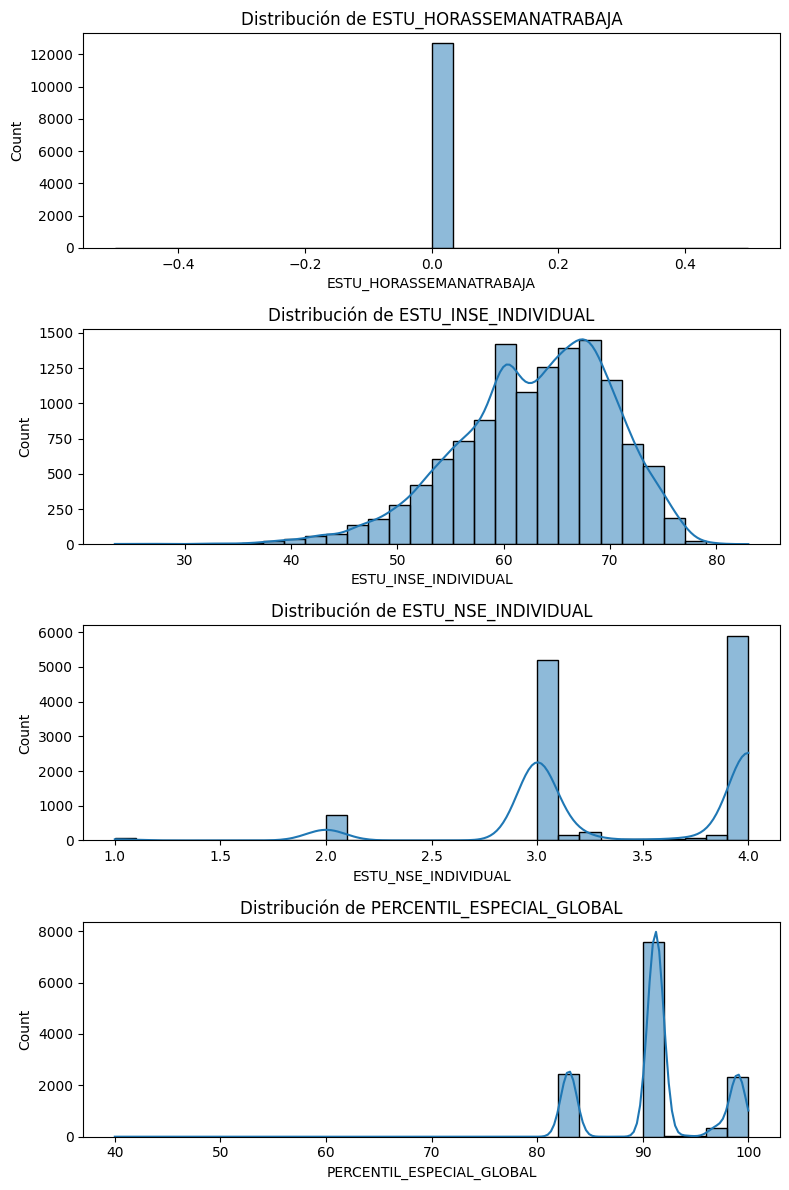

{'categorical_analysis': {'FAMI_ESTRATOVIVIENDA': array(['Estrato 3', 'Estrato 2', 'Sin Estrato', 'Estrato 1', 'Estrato 5',
         'Estrato 4', 'Estrato 6', 'Desconocido'], dtype=object),
  'FAMI_EDUCACIONPADRE': array(['Educación profesional completa',
         'Secundaria (Bachillerato) incompleta', 'Ninguno',
         'Técnica o tecnológica completa', 'No sabe', 'Primaria incompleta',
         'Postgrado', 'No Aplica', 'Secundaria (Bachillerato) completa',
         'Técnica o tecnológica incompleta',
         'Educación profesional incompleta', 'Primaria completa',
         'Desconocido'], dtype=object),
  'FAMI_EDUCACIONMADRE': array(['Educación profesional completa', 'Primaria completa',
         'Primaria incompleta', 'Secundaria (Bachillerato) completa',
         'Técnica o tecnológica incompleta',
         'Secundaria (Bachillerato) incompleta', 'No Aplica', 'Postgrado',
         'No sabe', 'Técnica o tecnológica completa',
         'Educación profesional incompleta', 'Descon

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de distribución de datos
analysis_results = {}

# Ver valores únicos en columnas categóricas
categorical_analysis = {col: df[col].unique() for col in categorical_columns}

# Estadísticas de columnas numéricas
numerical_stats = df[numerical_columns].describe()

# Detección de valores atípicos usando IQR (Percentil 25 y 75)
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

# Crear histogramas para columnas numéricas
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(8, len(numerical_columns) * 3))
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

# Guardar y mostrar resultados
analysis_results['categorical_analysis'] = categorical_analysis
analysis_results['numerical_stats'] = numerical_stats
analysis_results['outliers'] = outliers


analysis_results


Como se puede observar en las gráficas, los datos siguen comportamientos aparentemente normales y no requieren ninguna transformación o modificación adicional.